In [1]:
import joblib
import sys
sys.path.insert(0,'/Users/walfits/Repositories/Aglaia/')
import energies_NN as nn
import numpy as np
from sklearn import model_selection as modsel
import pandas as pd
import seaborn as sns

In [2]:
# Loading the data
data = joblib.load("cc_demeaned_kjmol.bz")
X = data["X"]
y = np.reshape(data["y"], (data["y"].shape[0],))

print(X.shape, y.shape)

(20698, 28) (20698,)


In [3]:
# Splitting the data
X_train, X_test, y_train, y_test = modsel.train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)

(16558, 28)


In [4]:
# Training the model
estimator = nn.Energies_NN(max_iter=4000, learning_rate_init=0.005, hidden_layer_sizes=(13,), batch_size=1000,
                              alpha=0.0005, tensorboard=False)

In [5]:
estimator.fit(X_train, y_train)

In [6]:
estimator.scoreFull(X_test, y_test)

(0.91292966440457834,
 23.196289150915263,
 17.518049515436328,
 102.37369335629046,
 148.7658810702851)

In [7]:
np.random.seed(seed=2)
random_input = abs(np.random.rand(28))
alpha_l1 = [0.0000001, 0.0000005, 0.000001, 0.00005, 0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]

In [8]:
all_data = []
for al in alpha_l1:
    estimator.optimise_input(random_input, al, 0, 0)
    all_data.append(estimator.final_x_tot)

The activations at the end of the optimisations are:
[array([[ 0.99999213]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 0.99999964]], dtype=float32), array([[ 0.99999881]], dtype=float32), array([[ 0.99998724]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 0.99999917]], dtype=float32), array([[ 0.99999988]], dtype=float32), array([[ 1.]], dtype=float32)]
The activations at the end of the optimisations are:
[array([[ 0.99999189]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 0.99999988]], dtype=float32), array([[ 0.99999952]], dtype=float32), array([[ 0.99999881]], dtype=float32), array([[ 0.99998629]], dtype=float32), array([[ 0.99999988]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 0.99999917]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]]

In [9]:
node = 11
dfc = pd.DataFrame()
dfc["log_alpha"]=-np.log(alpha_l1)
features = []

for i in range(len(all_data[0][0])): # 0-27
    fi = []
    for j in range(len(all_data)):   # 0-5
        fi.append(all_data[j][node][i])
    features.append(fi)
    
print(len(features))
print(len(features[0]))

28
14


In [10]:
cols = ["C1", "C1H1", "C1H2", "C1H3", "C1H4", "C1C2", "C1N", "H1", "H1H2", "H1H3", "H1H4", "H1C2", "H1N", "H2", "H2H3", "H2H4", "H2C2", "H2N", "H3", "H3H4", "H3C2", "H3N", "H4", "H4C2", "H4N", "C2", "C2N", "N"]
for i in range(len(features)):
    name = cols[i]
    dfc[name] = features[i]

dfc.head()

,log_alpha,C1,C1H1,C1H2,C1H3,C1H4,C1C2,C1N,H1,H1H2,...,H3,H3H4,H3C2,H3N,H4,H4C2,H4N,C2,C2N,N
0,16.118096,0.000000,0.065052,0.589066,0.471928,0.361624,0.360137,0.000000,0.000023,0.363353,...,0.000031,0.195263,0.311955,0.103540,0.000000,0.000000,0.023155,0.00000,0.000226,0.000366
1,14.508658,0.002132,0.000066,0.318793,0.190465,0.000091,0.051458,0.000000,0.000273,0.190257,...,0.000326,0.229837,0.000000,0.000009,0.001823,0.000000,0.000074,0.00000,0.001557,0.000000
2,13.815511,0.000229,0.000127,0.013269,0.000005,0.000000,0.000000,0.000144,0.000249,0.006169,...,0.000923,0.305368,0.000000,0.000038,0.000000,0.000000,0.000337,0.00000,0.000000,0.000000
3,9.903488,0.002189,0.000000,0.000000,0.000000,0.002718,0.000000,0.000000,0.000000,0.003155,...,0.000000,1.020019,0.000000,0.001317,0.000000,0.000000,0.000000,0.00233,0.000472,0.000000
4,11.512925,0.000000,0.000599,0.000000,0.000000,0.000000,0.001073,0.000000,0.000000,0.000707,...,0.001536,0.774642,0.000000,0.001673,0.000163,0.001282,0.000620,0.00000,0.000121,0.000000


In [11]:
# filename = "l1_scan_" + str(node) + "_seed_"+ str(2) + ".csv"
# dfc.to_csv(filename)

In [12]:
# node = 7
# dfc = pd.read_csv("l1_scan_7.csv", index_col=0)
# dfc.head()

In [13]:
df_melt = dfc.melt('log_alpha', var_name='cols',  value_name='vals')

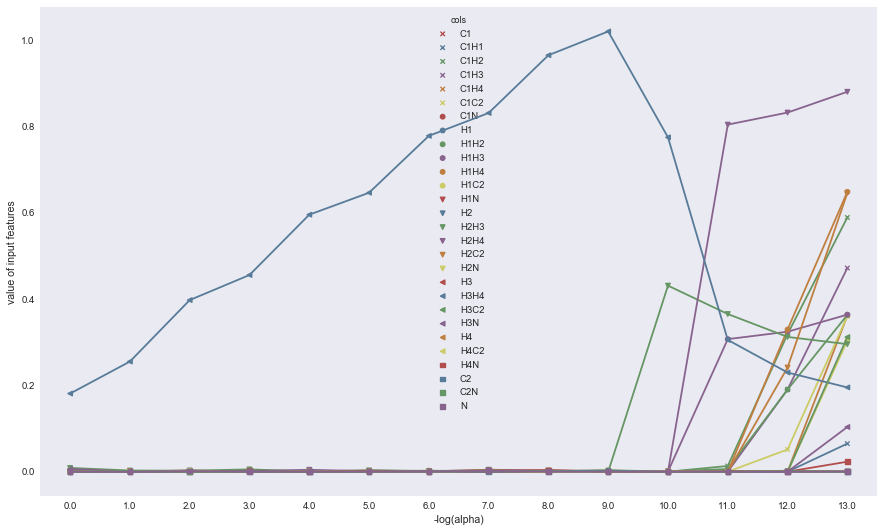

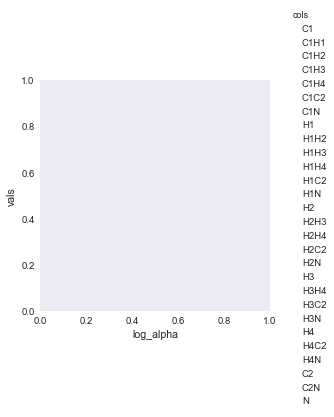

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

sns.set_style("darkgrid", {'axes.grid' : False})
sns.set_context("paper", font_scale=1.2 , rc={"lines.linewidth": 1})

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)


markers = ['x','x','x','x','x','x','o','o','o','o','o','o','v','v','v','v','v','v','<','<','<','<','<','<','s','s','s','s']
line_style = ["-","-","-","-","-","-","-","-","-",":",":",":",":",":",":",":",":",":","--","--","--","--","--","--","--","--","--","--"]
the_plot = sns.factorplot(x="log_alpha", y="vals", hue='cols', data=df_melt, ax=ax, palette=sns.color_palette("Set1", desat=0.5),  markers=markers)
ax.set(xlabel='-log(alpha)', ylabel='value of input features')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# ax.set_ylim((-0.02,0.5))
fig.savefig("node1mod3.png", transparent=False, dpi=600)


plt.show()